In [29]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# To display multiple dataframes from one cell
from IPython.display import display

# To perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# To build a logistic regression model
from sklearn.linear_model import LinearRegression

#To build exponential smoothening models
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# To visualize ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# To build ARIMA model
from statsmodels.tsa.arima.model import ARIMA

#  To perform date arithmetic, allowing easy calculations and manipulations
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.stattools import adfuller

# To evaluate the performance of the model
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import statsmodels.tools.eval_measures as em
# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

from dateutil.parser import parse

In [141]:
df = pd.read_excel("Sales_Data.xlsx")

In [142]:
df["ORDERDATE"] = pd.to_datetime(df['ORDERDATE'], unit='D', origin='1899-12-30')


In [36]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [37]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small
2746,10414,47,65.52,9,3079.44,2020-05-06,2772,On Hold,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,Boston,51003,USA,Yoshido,Juri,Medium


In [38]:
df.dtypes

ORDERNUMBER                      int64
QUANTITYORDERED                  int64
PRICEEACH                      float64
ORDERLINENUMBER                  int64
SALES                          float64
ORDERDATE               datetime64[ns]
DAYS_SINCE_LASTORDER             int64
STATUS                          object
PRODUCTLINE                     object
MSRP                             int64
PRODUCTCODE                     object
CUSTOMERNAME                    object
PHONE                           object
ADDRESSLINE1                    object
CITY                            object
POSTALCODE                      object
COUNTRY                         object
CONTACTLASTNAME                 object
CONTACTFIRSTNAME                object
DEALSIZE                        object
dtype: object

In [39]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [41]:
round(df.describe(),3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000,2747.000,2747.000,2747.000,2747.000,2747.000,2747.000
mean,10259.762,35.103,101.099,6.491,3553.048,1757.086,100.692
std,91.878,9.762,42.043,4.231,1838.954,819.281,40.115
min,10100.000,6.000,26.880,1.000,482.130,42.000,33.000
25%,10181.000,27.000,68.745,3.000,2204.350,1077.000,68.000
50%,10264.000,35.000,95.550,6.000,3184.800,1761.000,99.000
75%,10334.500,43.000,127.100,9.000,4503.095,2436.500,124.000
max,10425.000,97.000,252.870,18.000,14082.800,3562.000,214.000


In [42]:
df.shape

(2747, 20)

In [53]:
df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [54]:
df['CITY'].unique()

array(['NYC', 'Reims', 'Paris', 'Pasadena', 'Burlingame', 'Lille',
       'Bergen', 'Melbourne', 'Newark', 'Bridgewater', 'Nantes',
       'Cambridge', 'Helsinki', 'Stavern', 'Allentown', 'Salzburg',
       'Chatswood', 'New Bedford', 'Liverpool', 'Madrid', 'Lule',
       'Singapore', 'South Brisbane', 'Philadelphia', 'Lyon', 'Vancouver',
       'Burbank', 'New Haven', 'Minato-ku', 'Torino', 'Boras',
       'Versailles', 'San Rafael', 'Nashua', 'Brickhaven', 'North Sydney',
       'Montreal', 'Osaka', 'White Plains', 'Kobenhavn', 'London',
       'Toulouse', 'Barcelona', 'San Diego', 'Bruxelles', 'Tsawassen',
       'Boston', 'Cowes', 'Oulu', 'San Jose', 'Graz', 'Makati City',
       'Marseille', 'Koln', 'Gensve', 'Reggio Emilia', 'Frankfurt',
       'Espoo', 'Dublin', 'Manchester', 'Aaarhus', 'Glendale', 'Sevilla',
       'Brisbane', 'Strasbourg', 'Las Vegas', 'Oslo', 'Bergamo',
       'Glen Waverly', 'Munich', 'Charleroi'], dtype=object)

In [55]:
df['PRODUCTCODE'].unique()

array(['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', 'S10_4757',
       'S10_4962', 'S12_1099', 'S12_1108', 'S12_1666', 'S12_2823',
       'S12_3148', 'S12_3380', 'S12_3891', 'S12_3990', 'S12_4473',
       'S12_4675', 'S18_1097', 'S18_1129', 'S18_1342', 'S18_1367',
       'S18_1589', 'S18_1662', 'S18_1749', 'S18_1889', 'S18_1984',
       'S18_2238', 'S18_2248', 'S18_2319', 'S18_2325', 'S18_2432',
       'S18_2581', 'S18_2625', 'S18_2795', 'S18_2870', 'S18_2949',
       'S18_2957', 'S18_3029', 'S18_3136', 'S18_3140', 'S18_3232',
       'S18_3259', 'S18_3278', 'S18_3320', 'S18_3482', 'S18_3685',
       'S18_3782', 'S18_3856', 'S18_4027', 'S18_4409', 'S18_4522',
       'S18_4600', 'S18_4668', 'S18_4721', 'S18_4933', 'S24_1046',
       'S24_1444', 'S24_1578', 'S24_1628', 'S24_1785', 'S24_1937',
       'S24_2000', 'S24_2011', 'S24_2022', 'S24_2300', 'S24_2360',
       'S24_2766', 'S24_2840', 'S24_2841', 'S24_2887', 'S24_2972',
       'S24_3151', 'S24_3191', 'S24_3371', 'S24_3420', 'S24_34

In [59]:
df['CUSTOMERNAME'].unique()

array(['Land of Toys Inc.', 'Reims Collectables', 'Lyon Souveniers',
       'Toys4GrownUps.com', 'Technics Stores Inc.',
       'Daedalus Designs Imports', 'Herkku Gifts', 'Auto Canal Petit',
       'Australian Collectors, Co.', 'Vitachrome Inc.',
       'Tekni Collectables Inc.', 'Gift Depot Inc.', 'La Rochelle Gifts',
       "Marta's Replicas Co.", 'Toys of Finland, Co.',
       'Baane Mini Imports', 'Diecast Classics Inc.',
       'Salzburg Collectables', 'Souveniers And Things Co.',
       'FunGiftIdeas.com', 'UK Collectables, Ltd.',
       'Euro Shopping Channel', 'Volvo Model Replicas, Co',
       'Corrida Auto Replicas, Ltd', 'Dragon Souveniers, Ltd.',
       'Classic Legends Inc.', 'Australian Gift Network, Co',
       'Classic Gift Ideas, Inc', 'Saveley & Henriot, Co.',
       'Canadian Gift Exchange Network', 'West Coast Collectables Co.',
       'Cambridge Collectables Co.', 'Super Scale Inc.',
       'Tokyo Collectables, Ltd', 'Amica Models & Co.',
       'Scandinavian Gift

In [163]:
df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Trains', 'Ships'], dtype=object)

In [62]:
df['CONTACTLASTNAME'].unique()

array(['Yu', 'Henriot', 'Da Cunha', 'Young', 'Hirano', 'Rance', 'Oeztan',
       'Perrier', 'Ferguson', 'Frick', 'Brown', 'King', 'Labrune',
       'Hernandez', 'Karttunen', 'Bergulfsen', 'Pipps', 'Huxley',
       'Benitez', 'Devon', 'Freyre', 'Berglund', 'Sommer', 'Natividad',
       'Calaghan', 'Cervantes', 'Saveley', 'Tannamuri', 'Thompson',
       'Tseng', 'Murphy', 'Shimamura', 'Accorti', 'Larsson', 'Tonini',
       'Nelson', "O'Hara", 'Fresnisre', 'Kentary', 'Schmitt', 'Petersen',
       'Tam', 'Roulet', 'Hardy', 'Saavedra', 'Dewey', 'Lincoln',
       'Yoshido', 'Bennett', 'Koskitalo', 'Bertrand', 'Mendel', 'Franco',
       'Victorino', 'Cruz', 'Lebihan', 'Pfalzheim', 'Holz', 'Moroni',
       'Barajas', 'Keitel', 'Suominen', 'Cassidy', 'Fernandez',
       'Ashworth', 'Ibsen', 'Kuo', 'Roel', 'Taylor', 'Citeaux', 'Klaeboe',
       'Rovelli', 'Connery', 'Lewis', 'Donnermeyer', 'Cartrain'],
      dtype=object)

In [63]:
df['CONTACTFIRSTNAME'].unique()

array(['Kwai', 'Paul', 'Daniel', 'Julie', 'Juri', 'Martine', 'Veysel',
       'Dominique', 'Peter', 'Michael', 'William', 'Janine', 'Marta',
       'Matti', 'Jonas', 'Kyung', 'Georg', 'Adrian', 'Violeta',
       'Elizabeth', 'Diego', 'Christina', 'Mart¡n', 'Eric', 'Maria',
       'Tony', 'Francisca', 'Mary', 'Yoshi', 'Steve', 'Leslie', 'Akiko',
       'Paolo', 'Valarie', 'Allen', 'Anna', 'Jean', 'Mory', 'Rosa',
       'Carine', 'Jytte', 'Ann', 'Wing C', 'Annette', 'Thomas', 'Eduardo',
       'Catherine', 'Helen', 'Pirkko', 'Sue', 'Marie', 'Roland', 'Wendy',
       'Arnold', 'Laurence', 'Henriette', 'Maurizio', 'Miguel', 'Kalle',
       'Jeff', 'Dean', 'Jesus', 'Victoria', 'Palle', 'Kee', 'Jose Pedro',
       'Frederique', 'Jan', 'Giovanni', 'Sean', 'Dan', 'Pascale'],
      dtype=object)

In [64]:
df['POSTALCODE'].unique()

array(['10022', '51100', '75508', '90003', '94217', '59000', 'N 5804',
       '75016', '3004', '94019', '97562', '44000', '51247', '21240',
       '4110', '70267', '5020', '2067', '50553', 'WX1 6LT', '28034',
       'S-958 22', '28023', '79903', '4101', '71270', '69004', 'V3F 2K1',
       '97823', '106-0032', '10100', 'S-844 67', '78000', '62005',
       '58339', '2060', 'H1J 1C3', '530-0003', '24067', '1734', 'WX3 6FW',
       '31000', 'WA1 1DP', '8022', '91217', 'B-1180', 'T2F 8M4', '51003',
       'PO31 7PJ', '90110', '75012', '8010', '69045', '1227 MM', '13008',
       '50739', '1203', '42100', '60528', 'FIN-02271', '2', 'EC2 5NT',
       '8200', '92561', '41101', '67000', '83030', 'N 0106', '24100',
       '3150', '97561', '80686', 'B-6000'], dtype=object)

# Exploratory Data Analysis

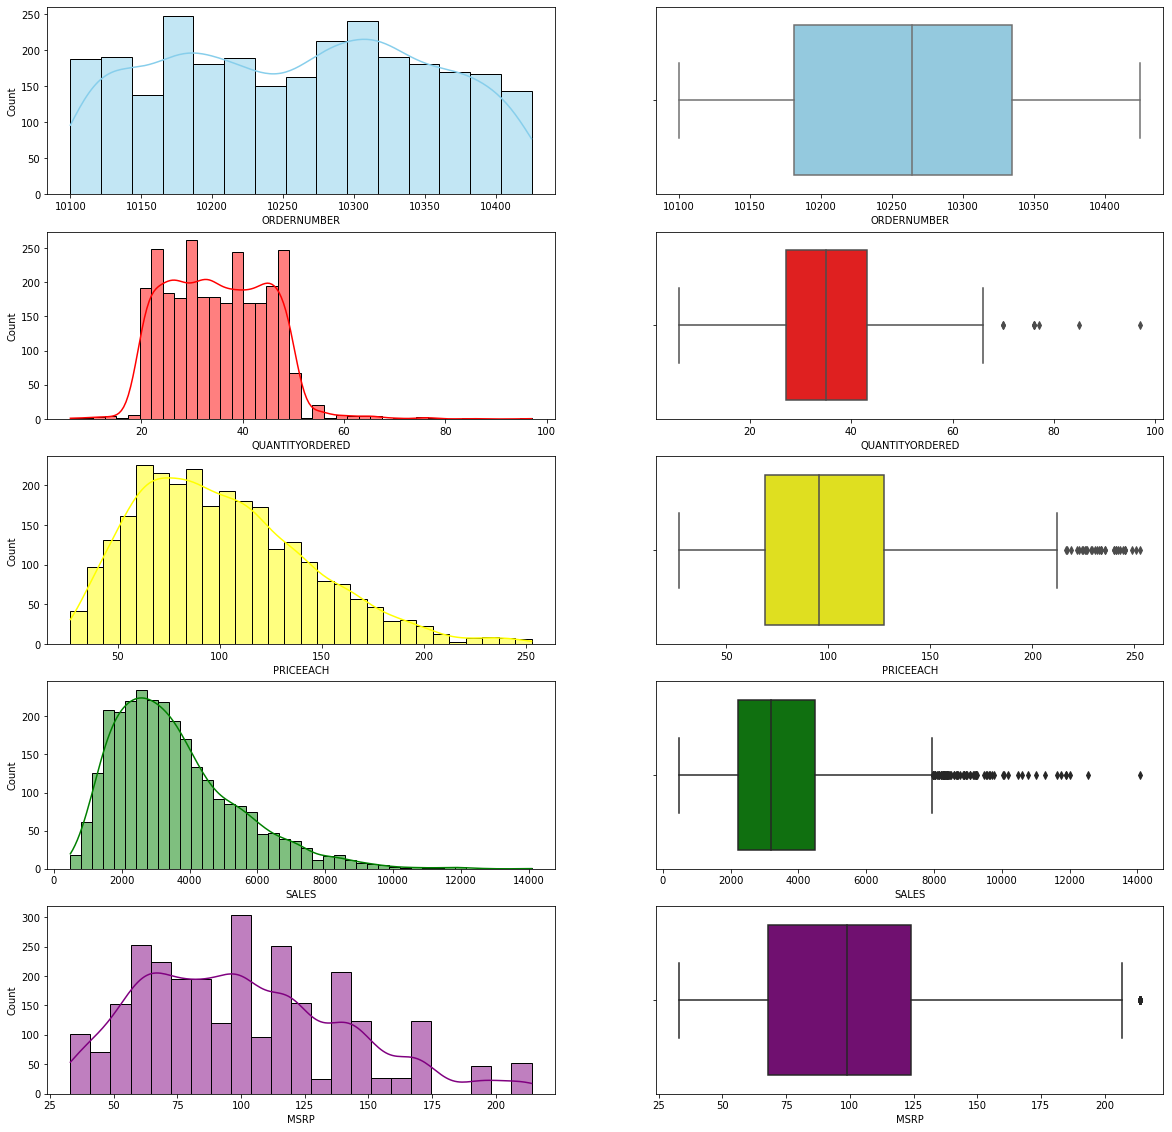

In [45]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20,20)
sns.histplot(df['ORDERNUMBER'], kde=True, color='skyblue', ax=axes[0][0])
sns.boxplot(x='ORDERNUMBER', data=df, color='skyblue', ax=axes[0][1])
sns.histplot(df['QUANTITYORDERED'] , kde=True, color='red', ax=axes[1][0])
sns.boxplot(x='QUANTITYORDERED', data=df , color='red', ax=axes[1][1])
sns.histplot(df['PRICEEACH'], kde=True, color='yellow', ax=axes[2][0])
sns.boxplot(x='PRICEEACH', data=df, color='yellow', ax=axes[2][1])
sns.histplot(df['SALES'], kde=True, color='green', ax=axes[3][0])
sns.boxplot(x='SALES', data=df, color='green', ax=axes[3][1])
sns.histplot(df['MSRP'], kde=True, color='purple', ax=axes[4][0])
sns.boxplot(x='MSRP', data=df, color='purple', ax=axes[4][1])
plt.show()

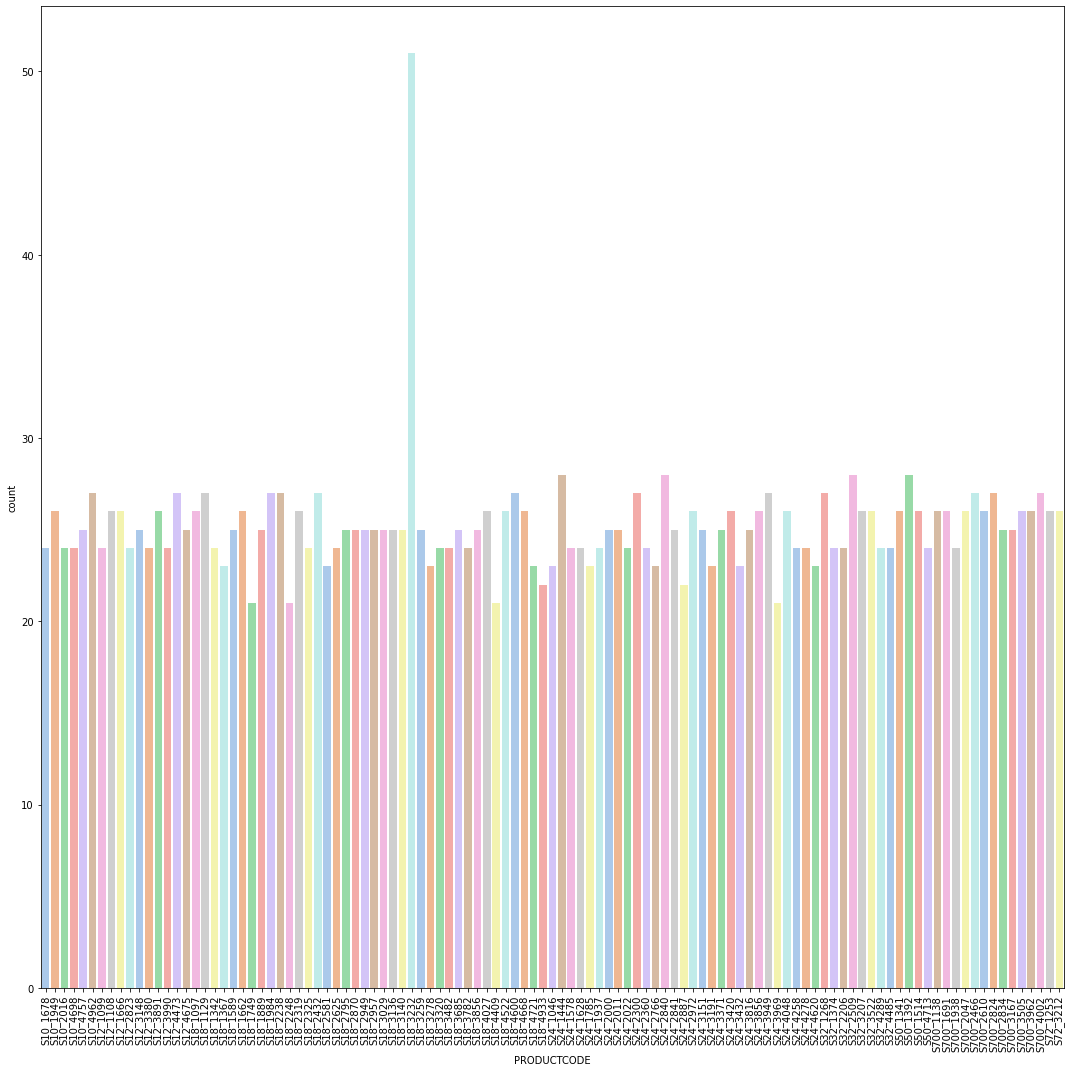

In [74]:
plt.figure(figsize=(15,15))
sns.countplot(x='PRODUCTCODE', data=df, palette='pastel')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

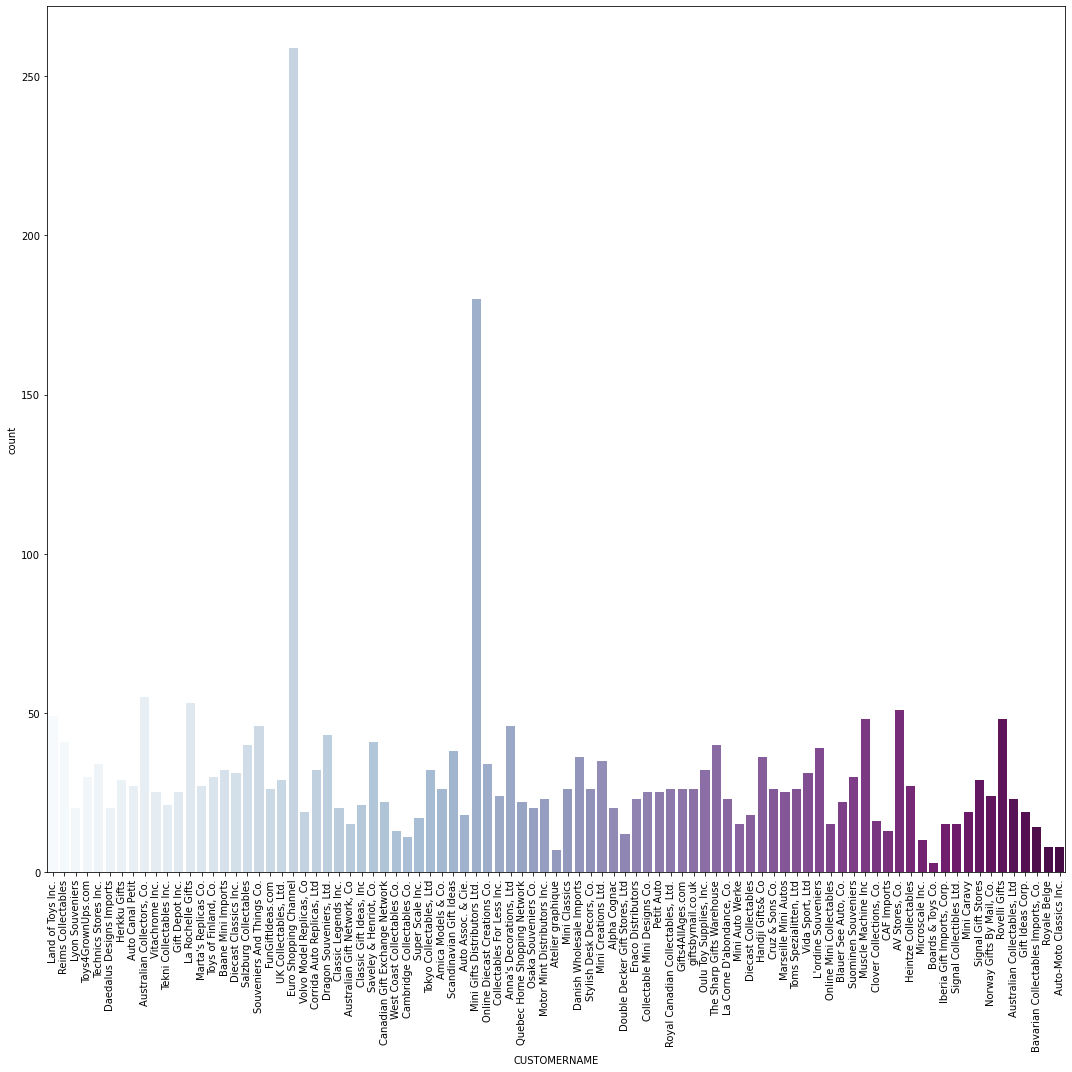

In [75]:
plt.figure(figsize=(15,15))
sns.countplot(x='CUSTOMERNAME', data=df, palette='BuPu')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

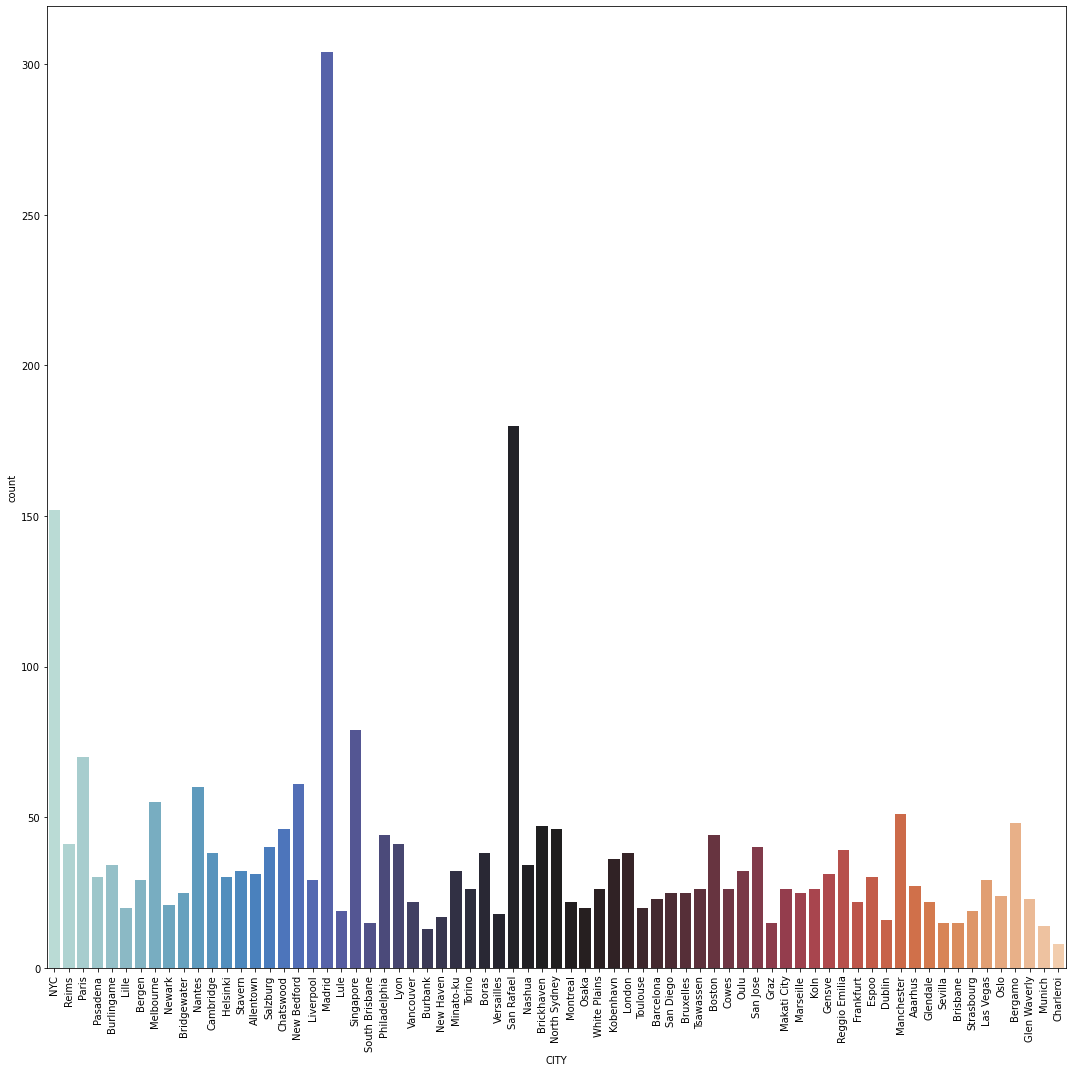

In [76]:
plt.figure(figsize=(15,15))
sns.countplot(x='CITY', data=df, palette='icefire')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

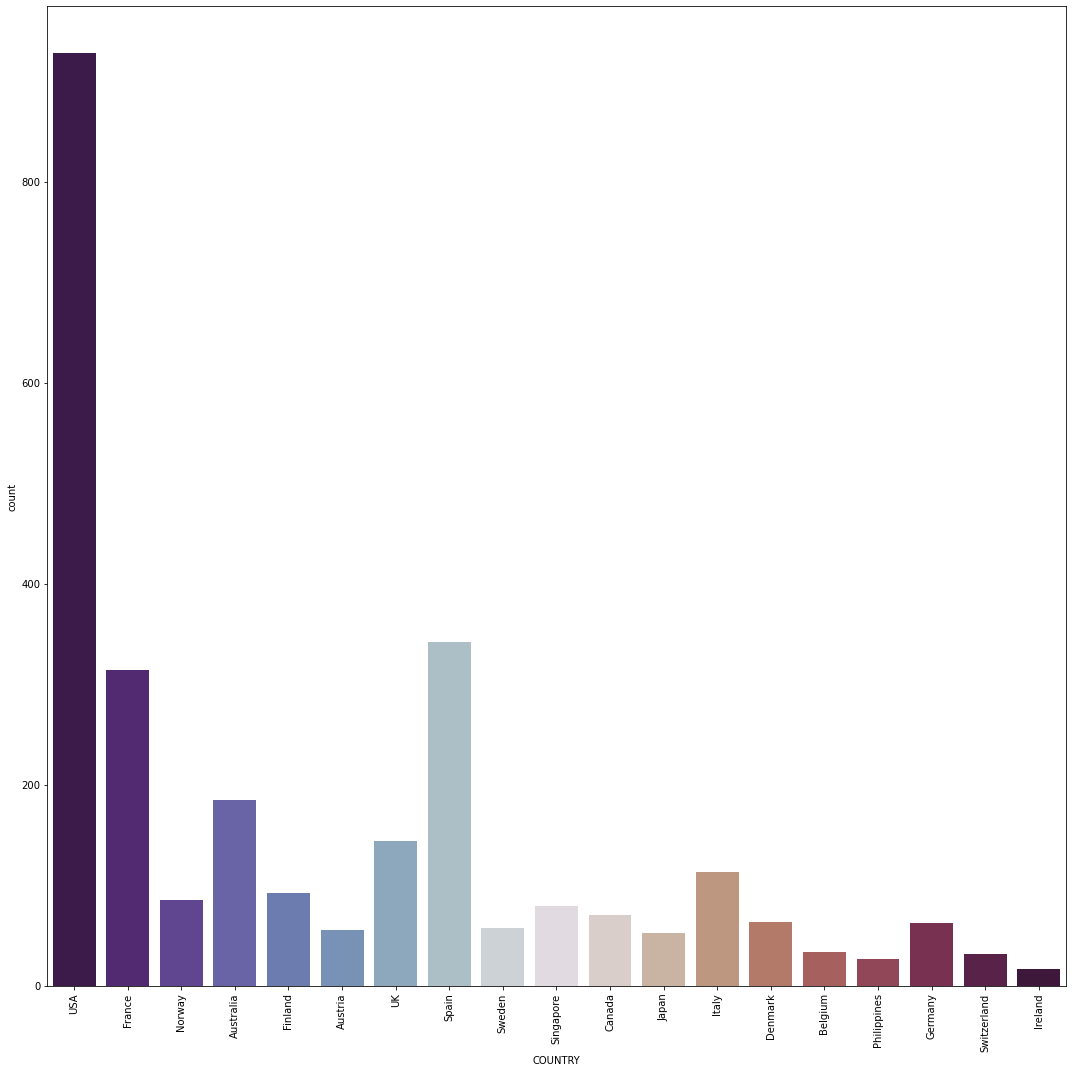

In [77]:
plt.figure(figsize=(15,15))
sns.countplot(x='COUNTRY', data=df, palette='twilight_shifted')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

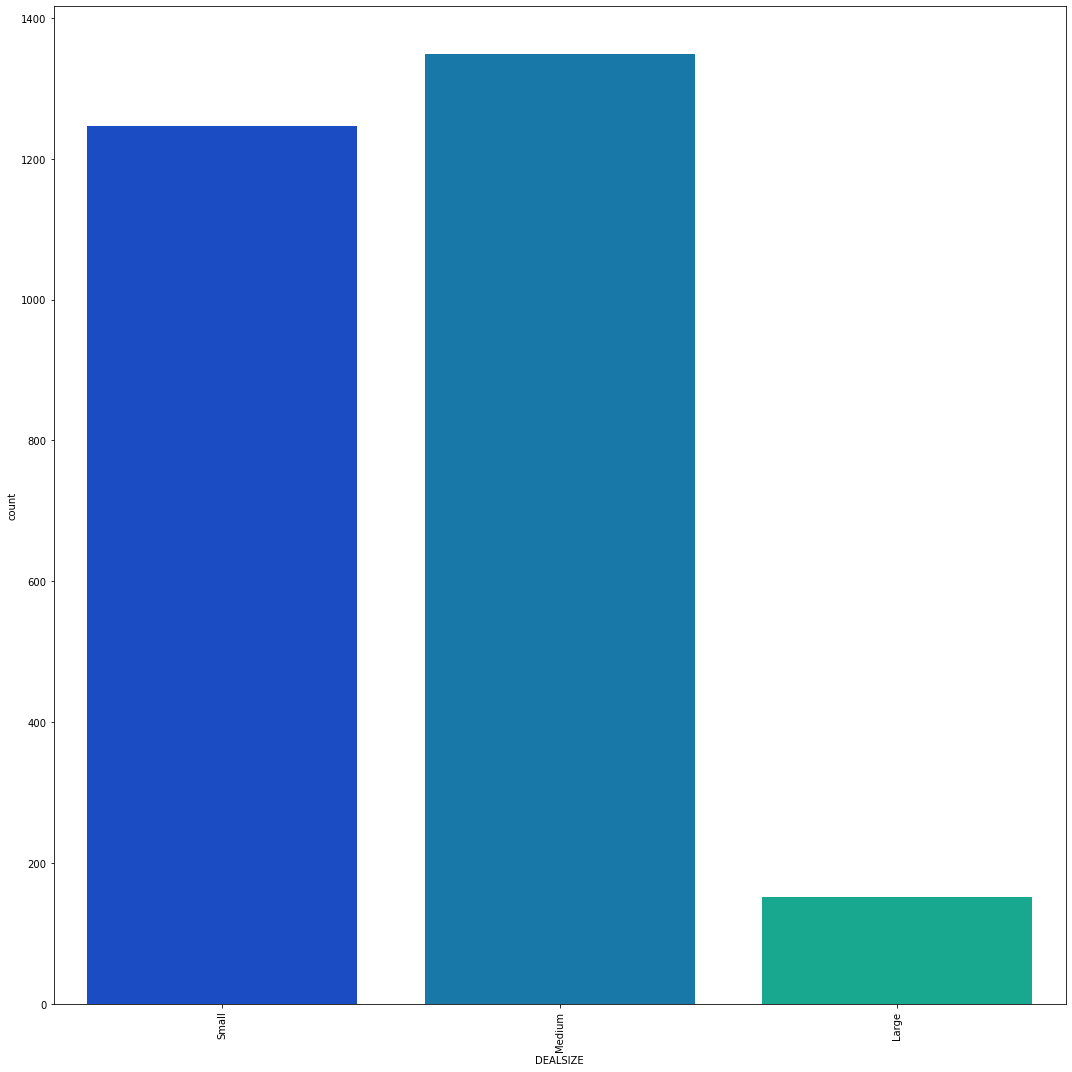

In [78]:
plt.figure(figsize=(15,15))
sns.countplot(x='DEALSIZE', data=df, palette='winter')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

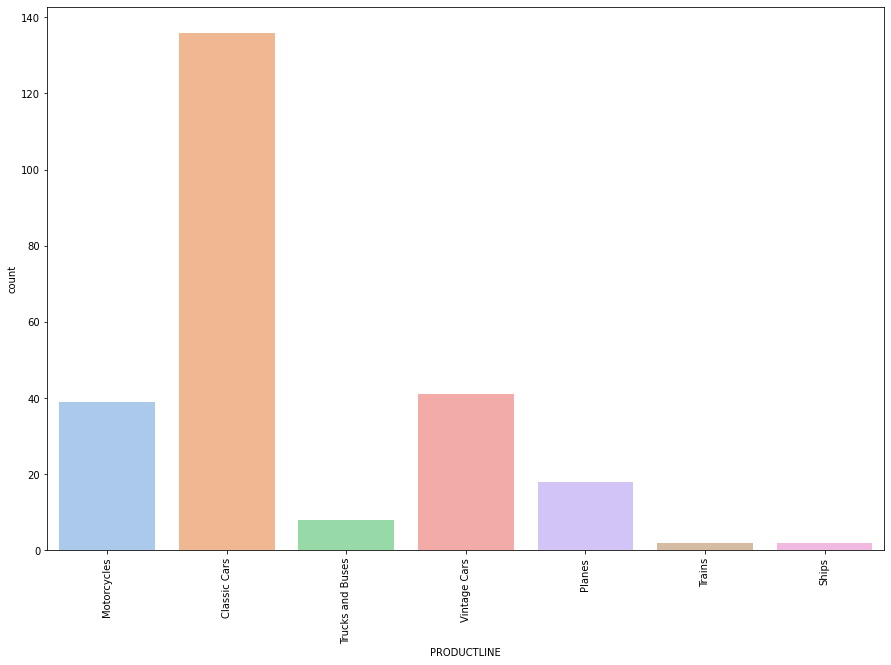

In [162]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='PRODUCTLINE', data=df, palette='pastel')
plt.show()

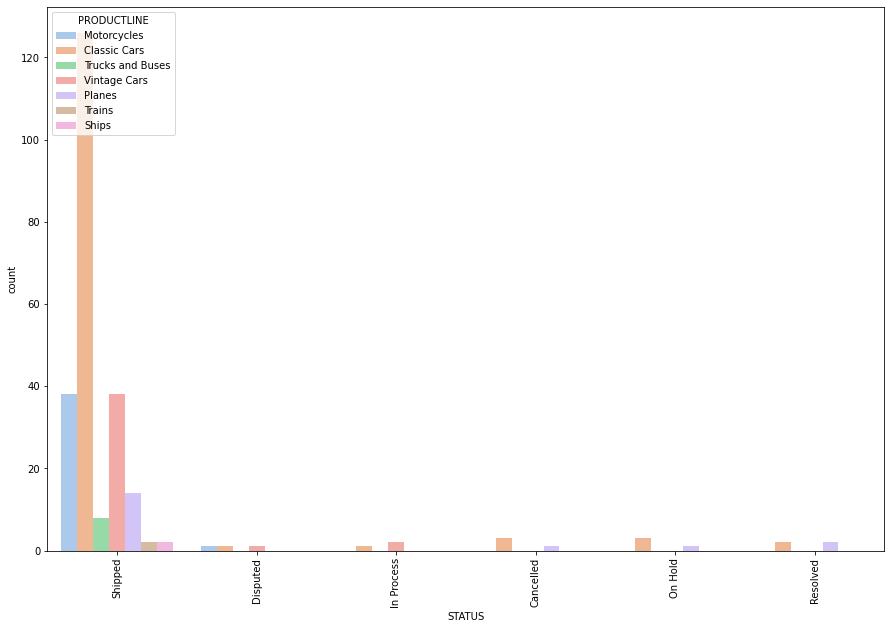

In [174]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='STATUS',hue="PRODUCTLINE", data=df, palette='pastel')
plt.show()

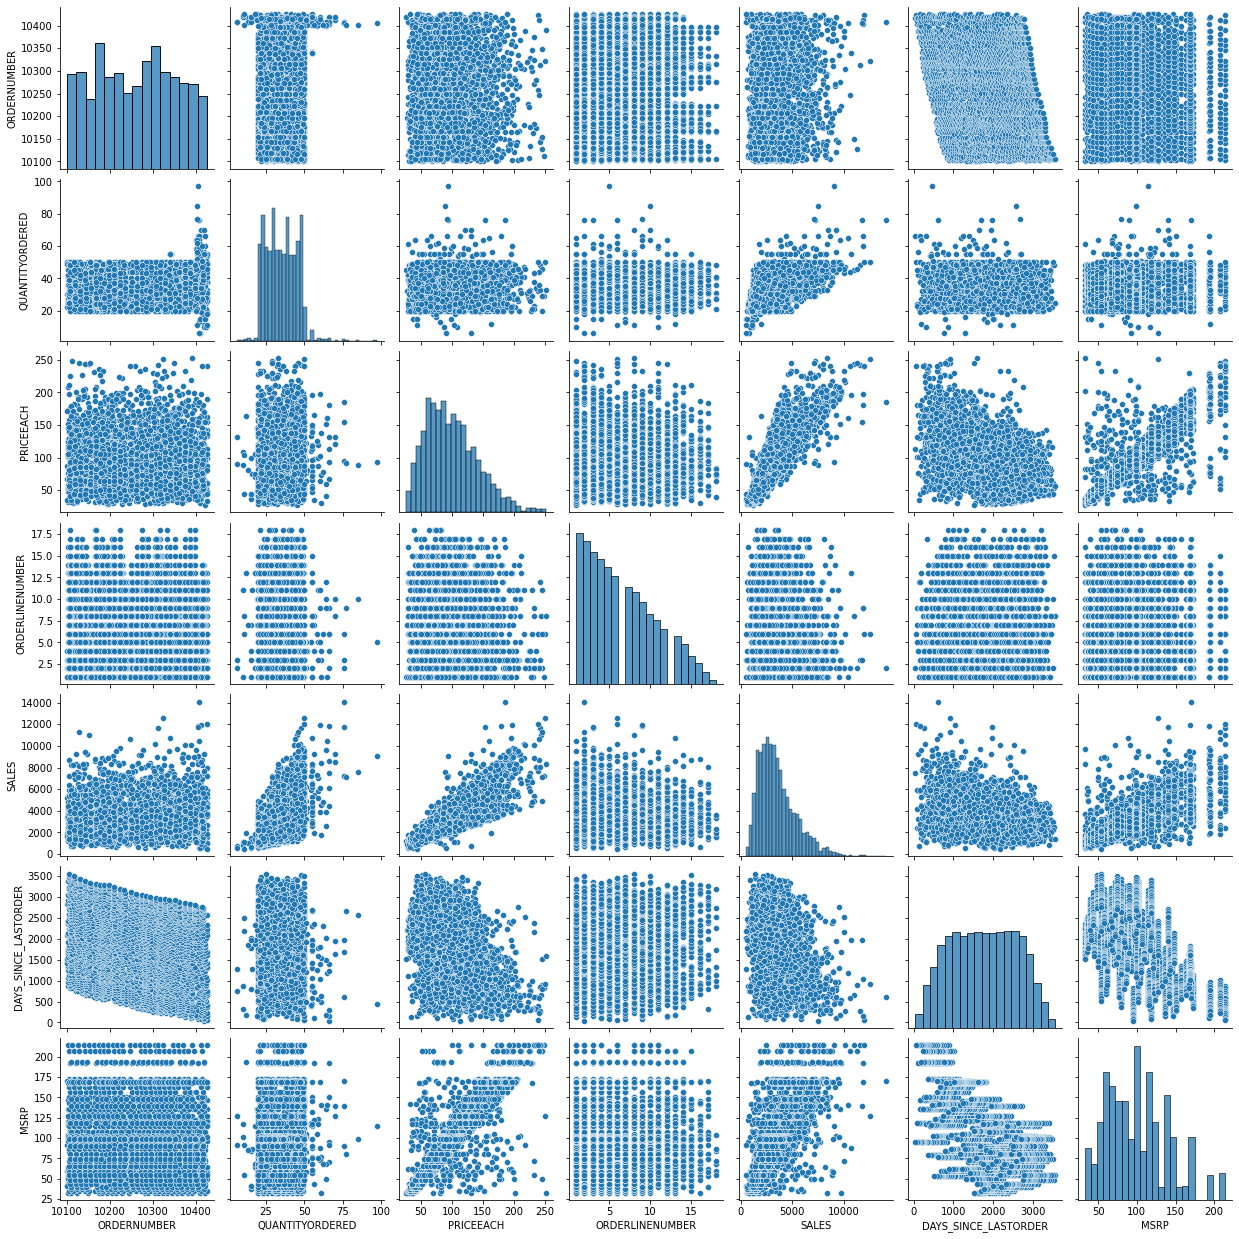

In [48]:
sns.pairplot(df)
plt.show()

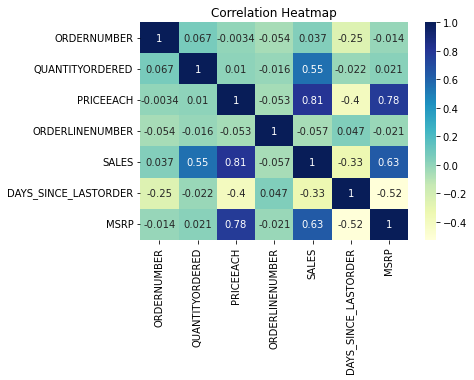

In [50]:
numeric_columns = df.select_dtypes(exclude=['datetime64']).columns

sns.heatmap(df[numeric_columns].corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap')
plt.show()

# Time series analysis

In [143]:
df['ORDERDATE'] = df['ORDERDATE'].dt.strftime('%d/%m/%Y')

In [146]:
df.set_index('ORDERDATE', inplace=True)

In [147]:
df = df[~df.index.duplicated(keep='first')]
df.index = pd.to_datetime(df.index)

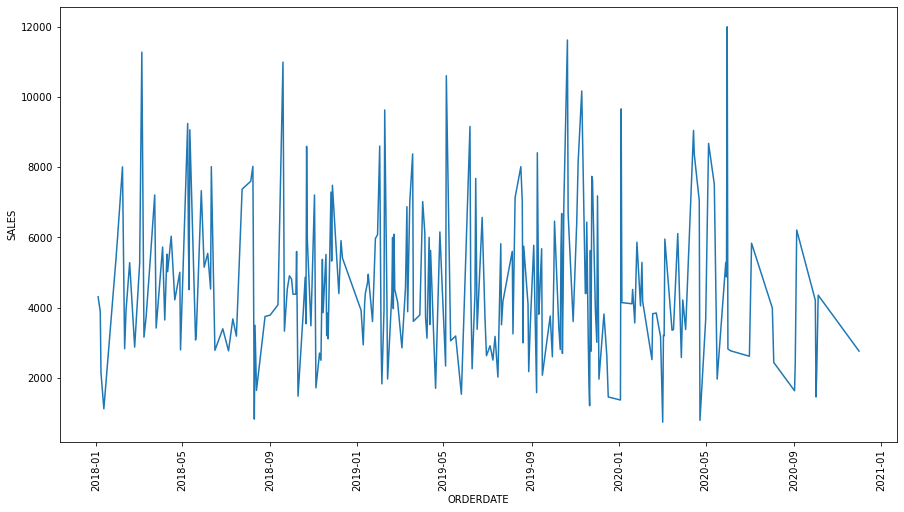

In [125]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=df, x=df.index, y='SALES')
plt.xticks(rotation=90)
plt.show()

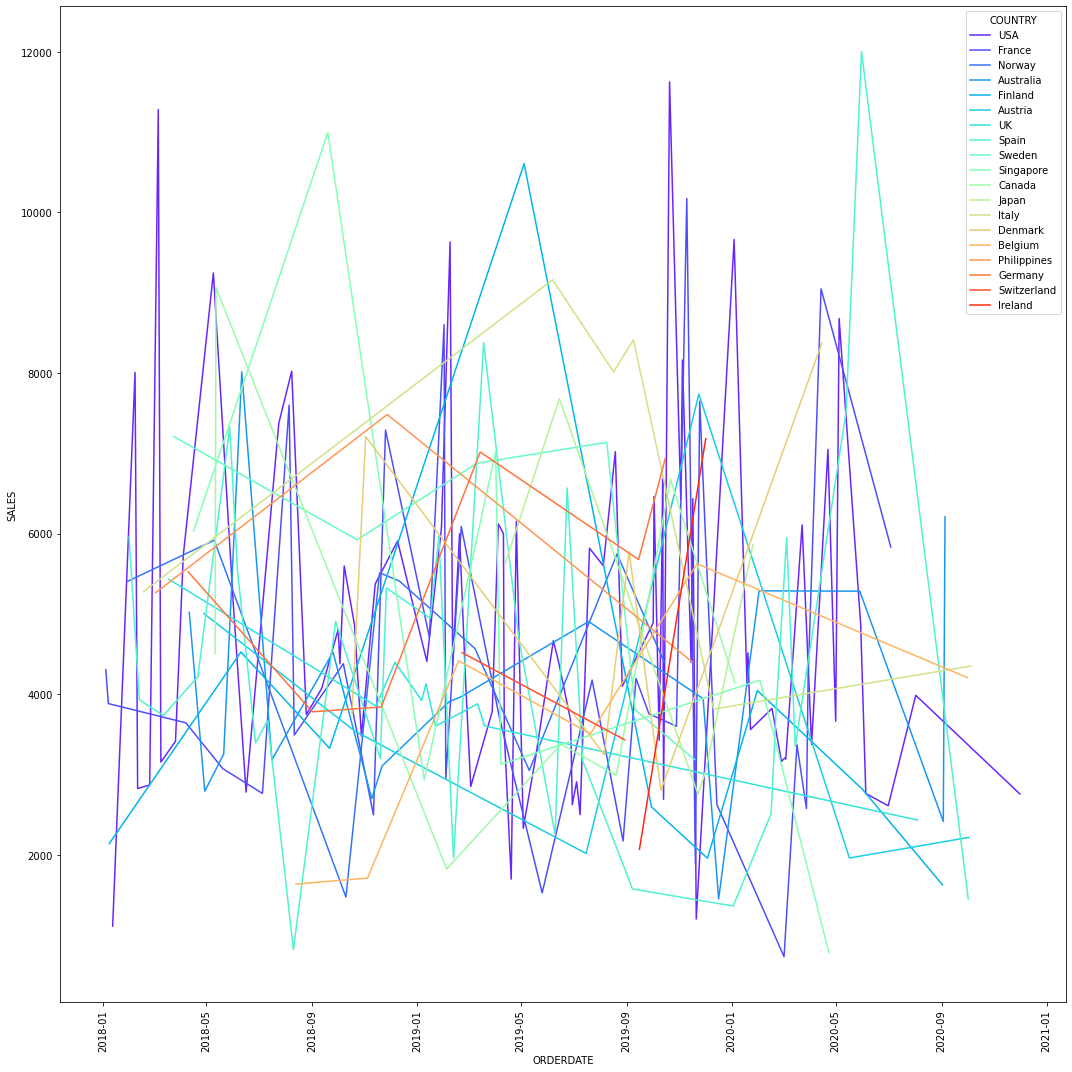

In [158]:
plt.figure(figsize=(15,15))
sns.lineplot(data=df, x=df.index, y='SALES', hue="COUNTRY", ci = False, palette="rainbow")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

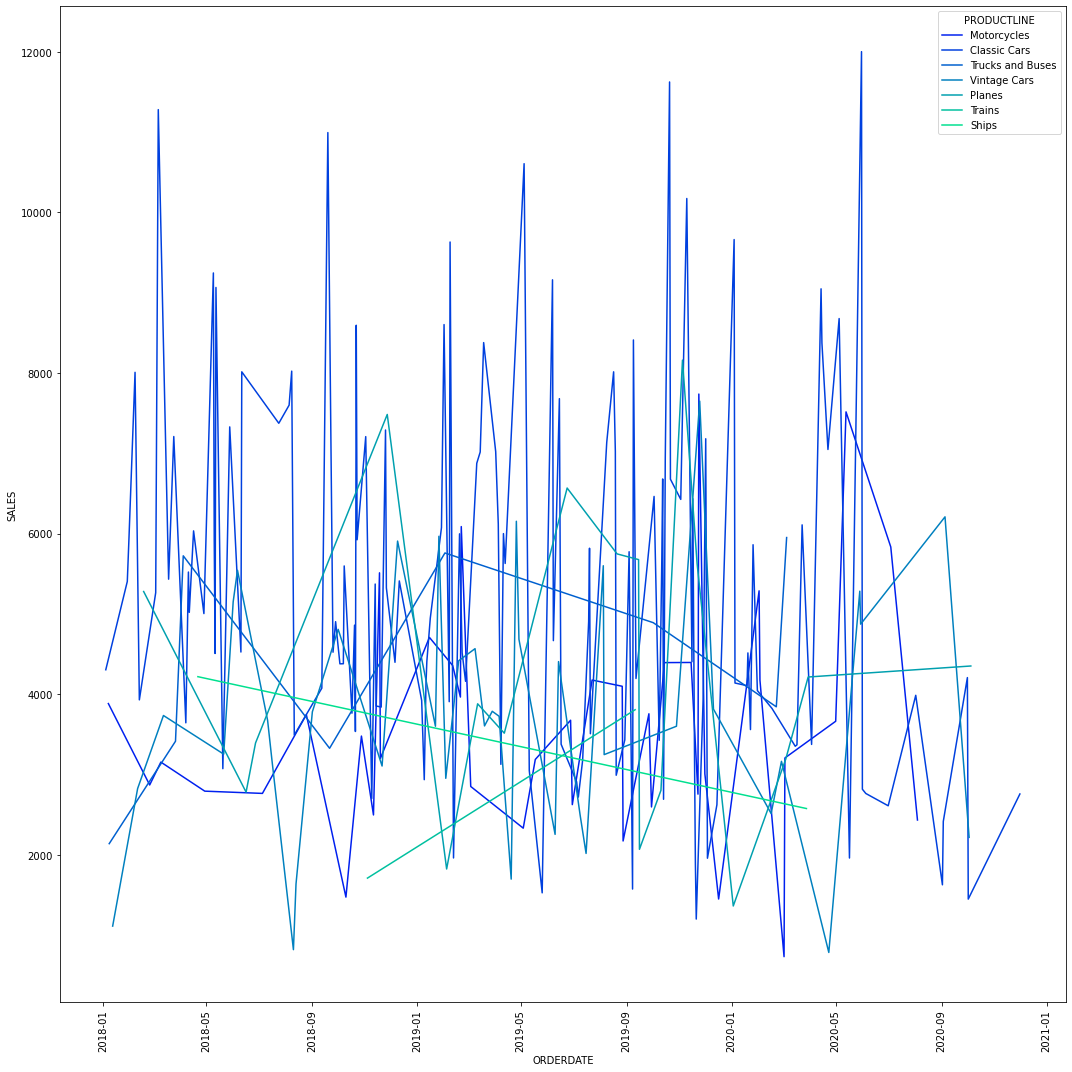

In [172]:
plt.figure(figsize=(15,15))
sns.lineplot(data=df, x=df.index, y='SALES', hue="PRODUCTLINE", ci = False, palette="winter")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [126]:
df = df.resample('M').mean()
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
ORDERDATE,,,,,,,
2018-01-31,10132.500000,30.333333,126.175000,4.666667,3801.075000,1242.50,128.000000
2018-02-28,10141.000000,31.800000,144.144000,6.200000,4583.126000,1223.20,145.600000
2018-03-31,10131.571429,35.571429,161.961429,4.428571,5641.897143,1114.00,148.428571
2018-04-30,10149.250000,34.750000,138.760000,4.750000,4745.320000,1223.25,151.000000
2018-05-31,10171.285714,37.571429,155.290000,5.285714,6056.275714,946.00,161.428571


In [127]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,10268.185768,34.969846,129.310641,5.159965,4473.817990,800.599038,138.711312
std,100.386167,5.072540,22.795486,1.879422,902.338880,305.966435,14.750006
min,10131.571429,26.000000,56.300000,1.000000,2758.700000,232.500000,106.000000
25%,10152.666667,31.788889,115.201500,4.547619,3801.499167,616.433333,129.111111
50%,10268.000000,34.555556,129.290000,5.222222,4583.126000,769.111111,135.300000
75%,10381.541667,37.500000,145.067000,6.250000,5033.733500,1022.875000,148.964286
max,10411.000000,51.800000,173.363333,10.555556,6282.415714,1474.833333,167.857143


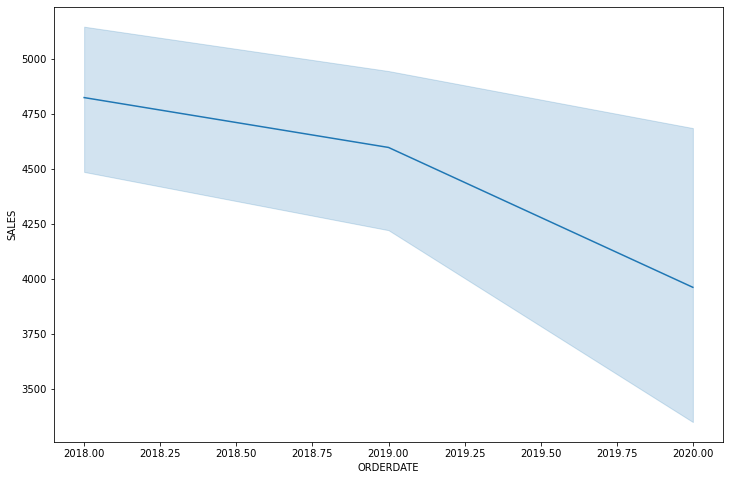

In [128]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x=df.index.year, y='SALES') 
plt.show()

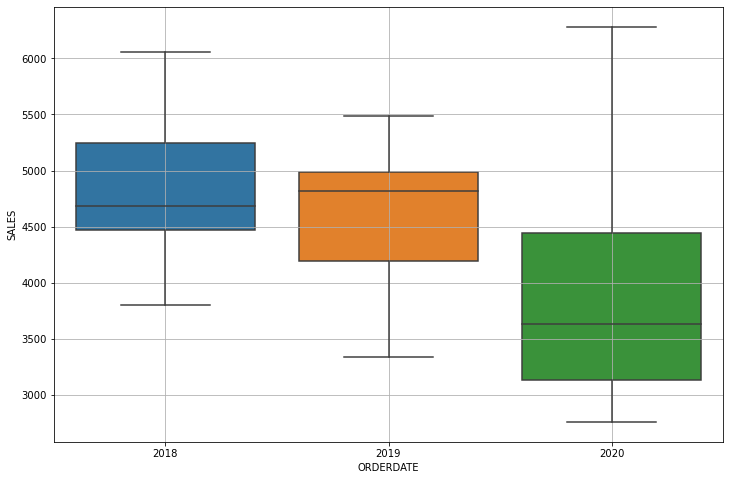

In [129]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df.index.year, y='SALES', data=df) 
plt.grid()
plt.show()

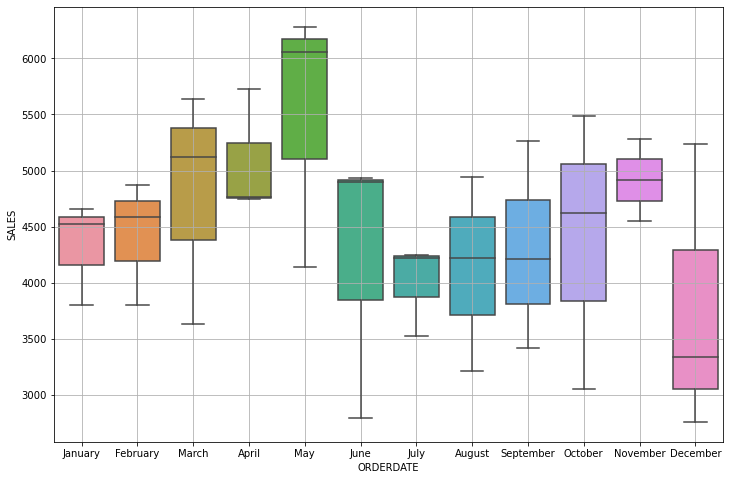

In [130]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df.index.month_name(), y='SALES', data=df) 
plt.grid()
plt.show()

In [131]:
monthly_sales_across_years = pd.pivot_table(df, values='SALES', columns=df.index.month_name(), index=df.index.year)
monthly_sales_across_years

ORDERDATE,April,August,December,February,January,July,June,March,May,November,October,September
ORDERDATE,,,,,,,,,,,,
2018,4745.320,4219.995,5238.936667,4583.126000,3801.075000,4250.1425,4901.968333,5641.897143,6056.275714,4546.515385,4618.226364,5267.898333
2019,4767.742,4946.622,3340.088333,4867.695714,4521.822222,3526.5100,4935.637778,5120.845000,4141.494000,5284.766429,5490.428333,4207.453333
2020,5726.470,3210.880,2758.700000,3801.923333,4657.116250,4222.8000,2791.375000,3634.487778,6282.415714,NaN,3057.070000,3417.910000


<Figure size 1440x720 with 0 Axes>

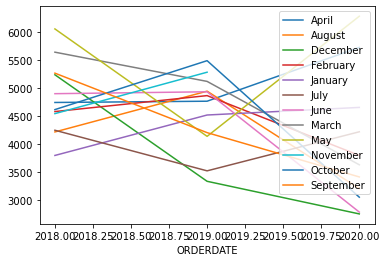

In [138]:
plt.figure(figsize=(20, 10))
monthly_sales_across_years.plot()
plt.legend(loc='best')
plt.show()